Лабораторная работа №2, Вариант 2
Цель работы: изучить программные средства, используемые для визуализации
наборов данных.
Выполнение работы
Следует получить у преподавателя индивидуальный вариант задания, связанного
с анализом данных конкретной предметной области. Файл данных находится либо в
облачном ресурсе, либо в сети. Необходимо подключить этот файл, скачать оттуда
данные в свой ноутбук Jupyter, поместить данные в объект DataFrame и провести
первичный анализ данных в заданной предметной области.
Особое внимание следует уделить графическому представлению распределений
признаков, визуализации взаимосвязей, позволяющие судить о наборе данных.
Построение графиков желательно произвести по нескольким проекциям. При анализе
данных использовать как можно более разнообразные типы графиков.

Датасет – bank.csv
1. Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

2. Загрузка данных

In [3]:
df = pd.read_csv('bank.csv', sep=';')

# Первичный осмотр данных
print("Первые 10 строк:")
print(df.head(10))
print("\nИнформация о датафрейме:")
print(df.info())
print("\nОсновные статистики:")
print(df.describe())

Первые 10 строк:
   age            job  marital  education default  balance housing loan  \
0   30     unemployed  married    primary      no     1787      no   no   
1   33       services  married  secondary      no     4789     yes  yes   
2   35     management   single   tertiary      no     1350     yes   no   
3   30     management  married   tertiary      no     1476     yes  yes   
4   59    blue-collar  married  secondary      no        0     yes   no   
5   35     management   single   tertiary      no      747      no   no   
6   36  self-employed  married   tertiary      no      307     yes   no   
7   39     technician  married  secondary      no      147     yes   no   
8   41   entrepreneur  married   tertiary      no      221     yes   no   
9   43       services  married    primary      no      -88     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cell

3. Визуализация распределения числовых признаков

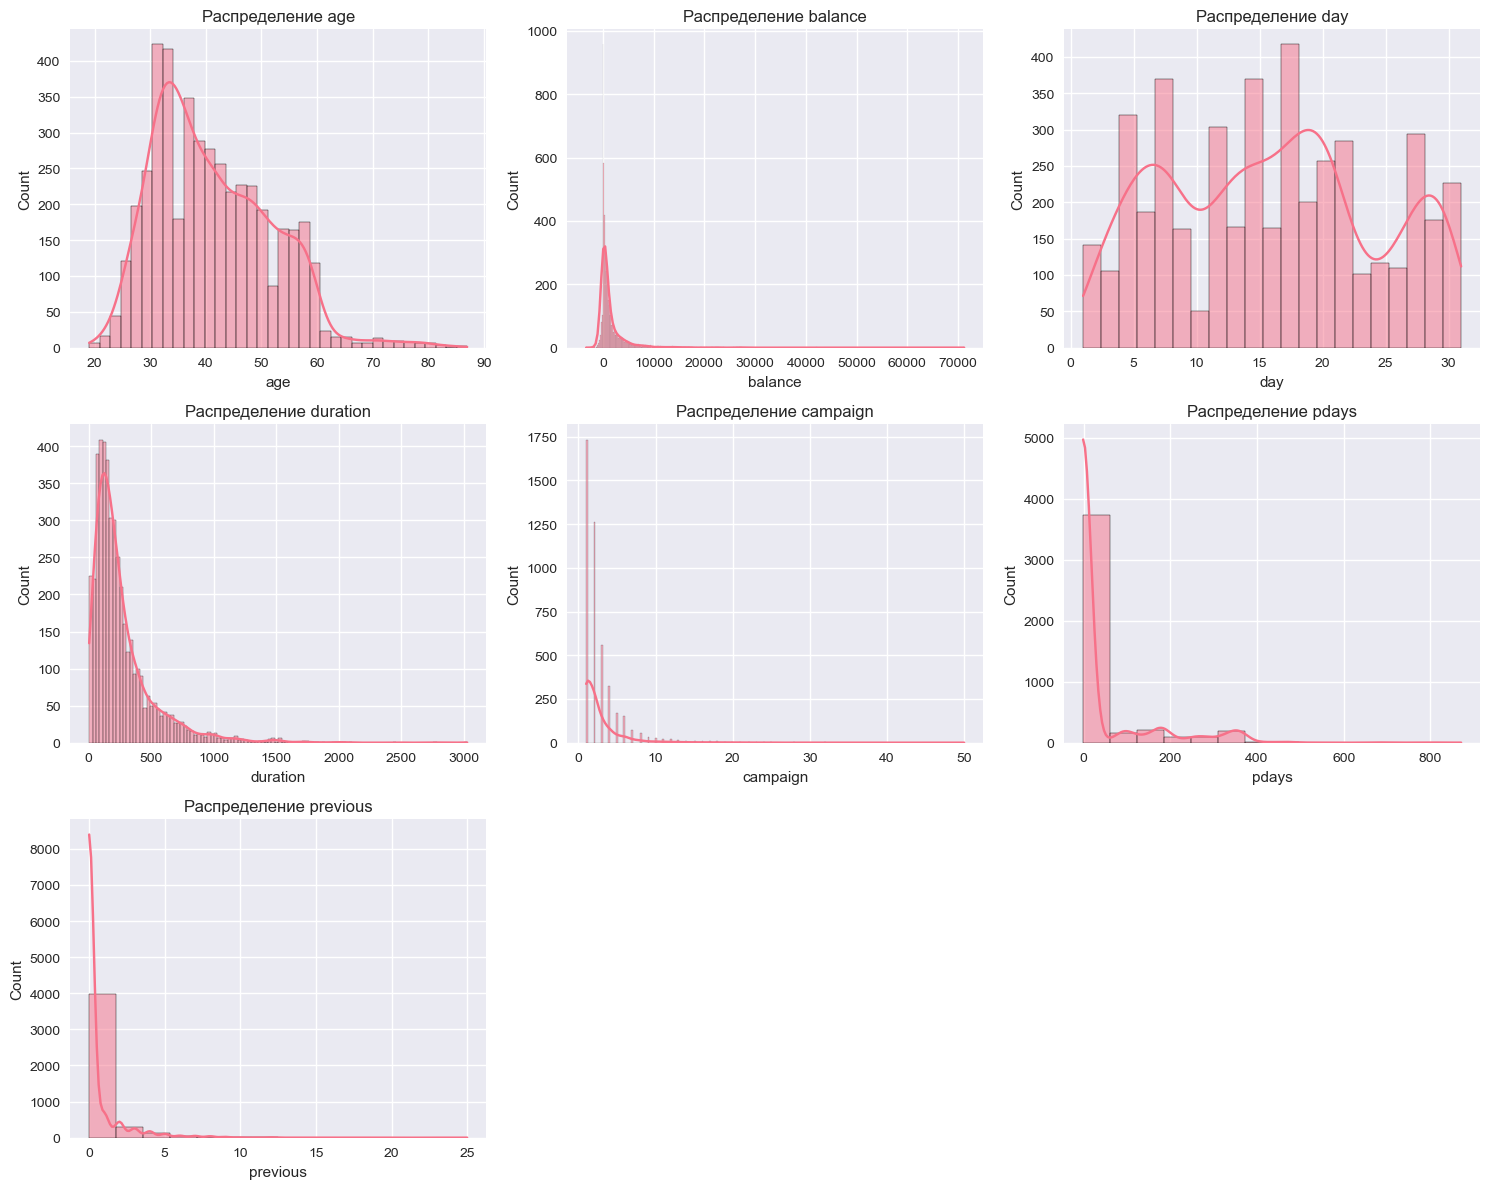

In [5]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    # Гистограмма с KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    
# Удаляем лишние subplots
for i in range(len(numerical_cols), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

4. Визуализация категориальных признаков

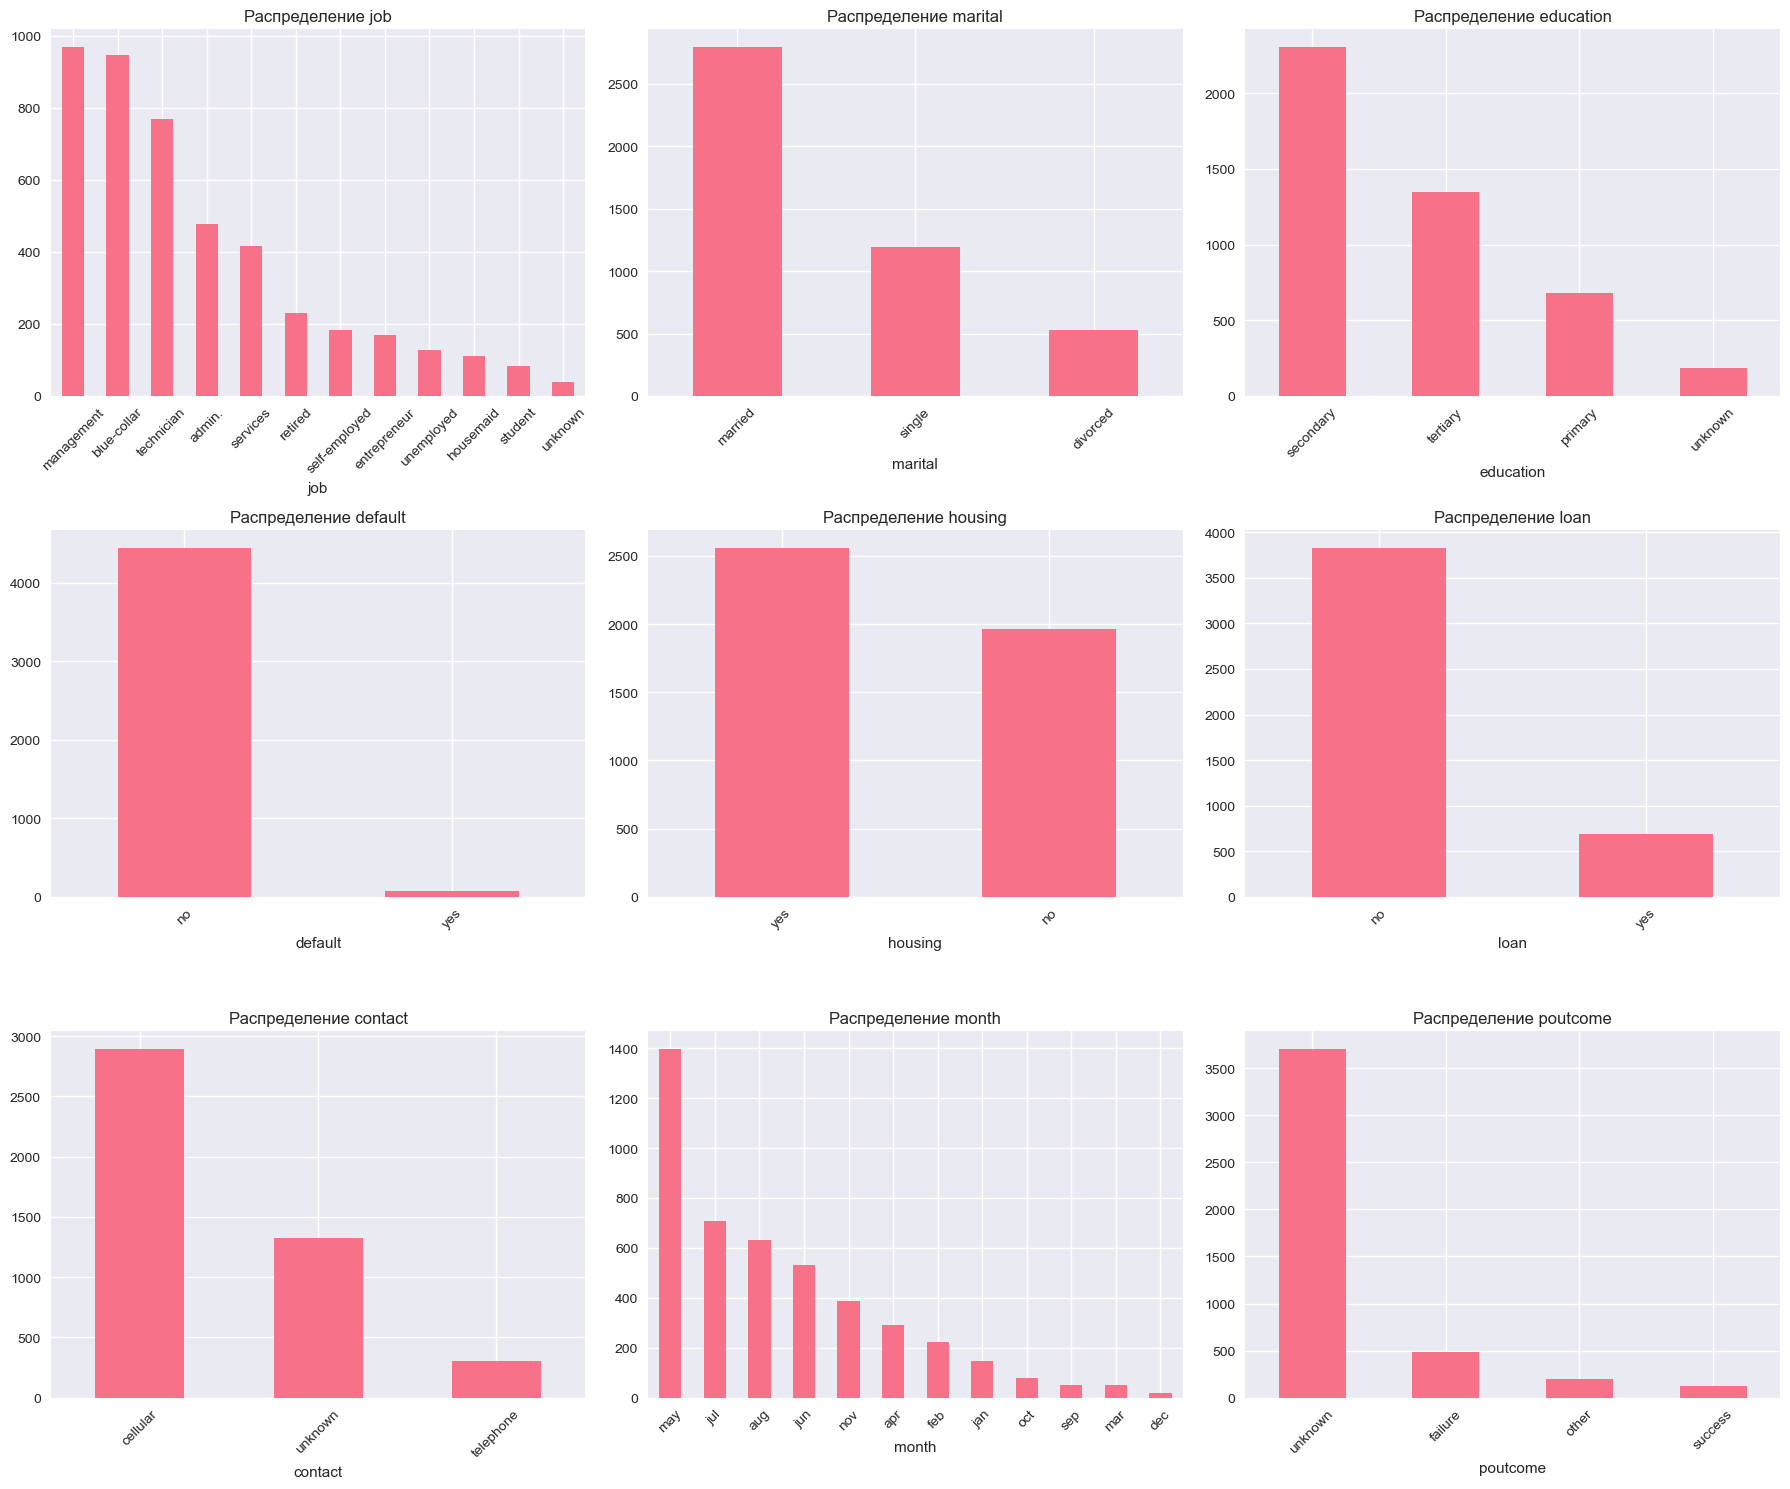

In [6]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    # Столбчатая диаграмма
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

5. Распределение целевой переменной

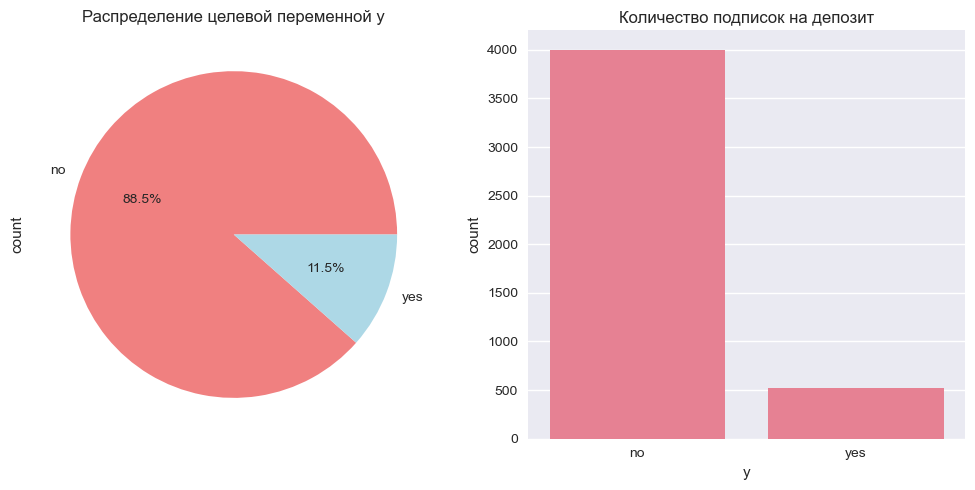

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Распределение целевой переменной y')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='y')
plt.title('Количество подписок на депозит')

plt.tight_layout()
plt.show()

6. Анализ взаимосвязей: числовые признаки vs целевая переменная

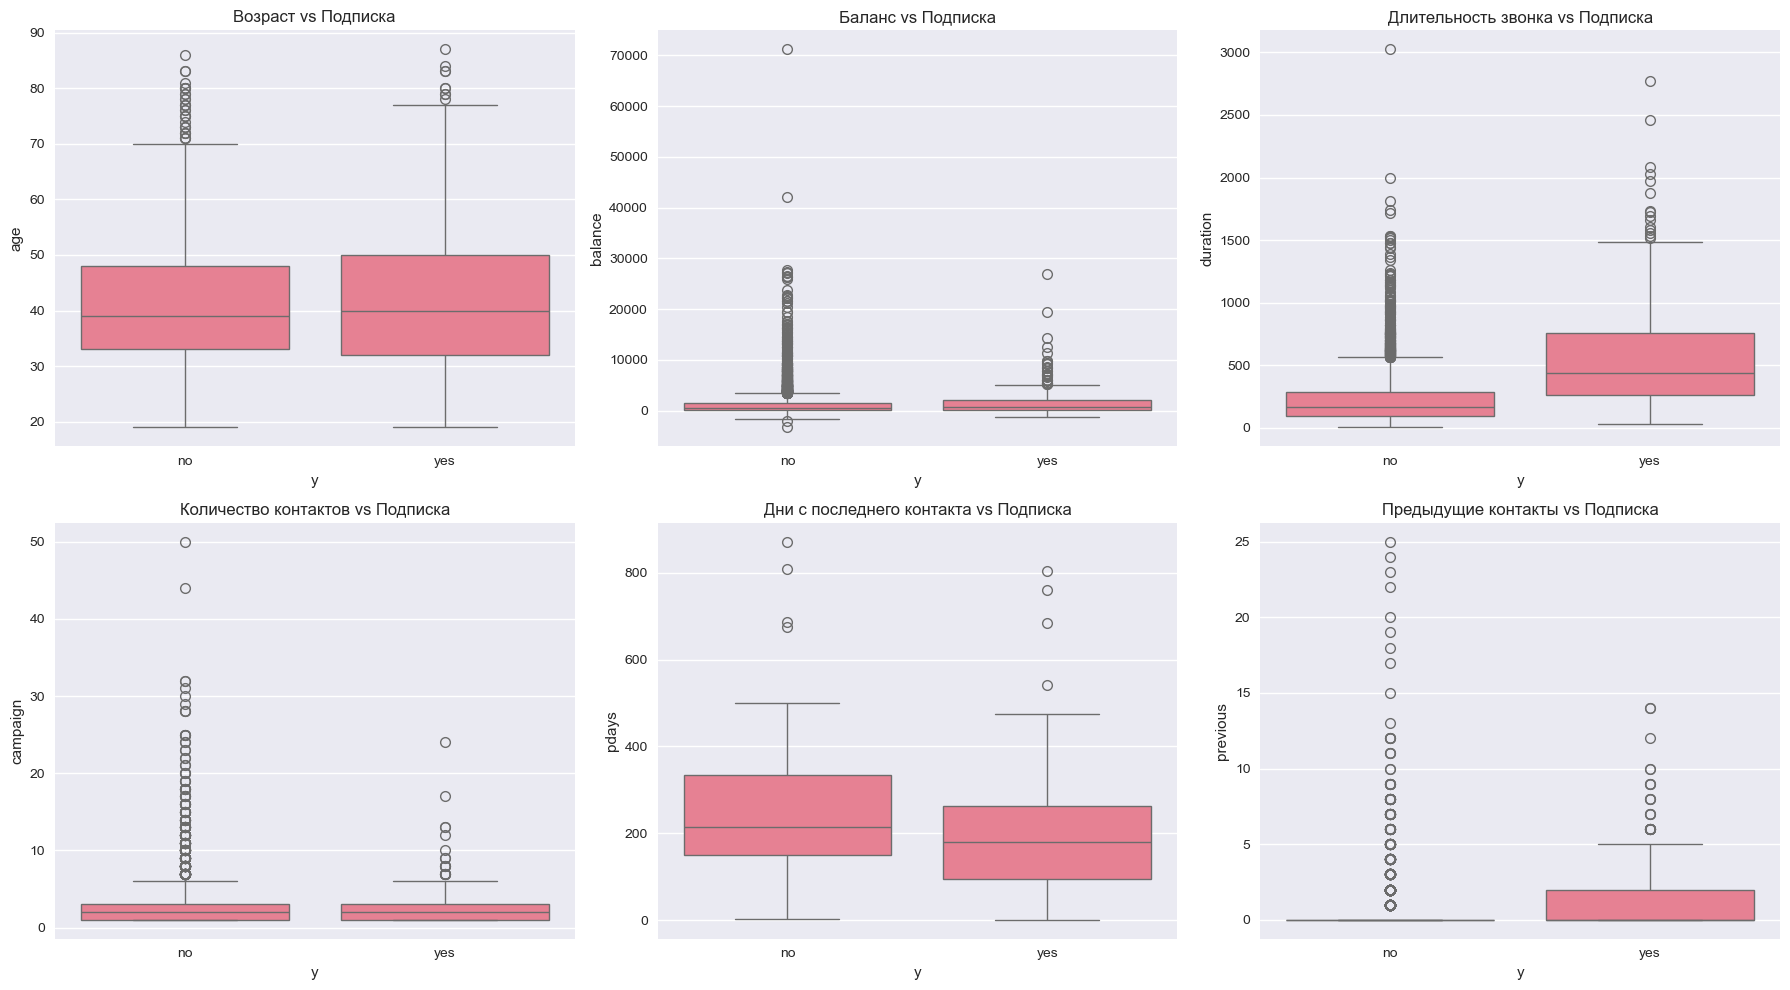

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Возраст
sns.boxplot(data=df, x='y', y='age', ax=axes[0,0])
axes[0,0].set_title('Возраст vs Подписка')

# Баланс
sns.boxplot(data=df, x='y', y='balance', ax=axes[0,1])
axes[0,1].set_title('Баланс vs Подписка')

# Длительность звонка
sns.boxplot(data=df, x='y', y='duration', ax=axes[0,2])
axes[0,2].set_title('Длительность звонка vs Подписка')

# Количество контактов
sns.boxplot(data=df, x='y', y='campaign', ax=axes[1,0])
axes[1,0].set_title('Количество контактов vs Подписка')

# Дни с последнего контакта
sns.boxplot(data=df[df['pdays'] != -1], x='y', y='pdays', ax=axes[1,1])
axes[1,1].set_title('Дни с последнего контакта vs Подписка')

# Предыдущие контакты
sns.boxplot(data=df, x='y', y='previous', ax=axes[1,2])
axes[1,2].set_title('Предыдущие контакты vs Подписка')

plt.tight_layout()
plt.show()

7. Анализ категориальных признаков относительно целевой переменной

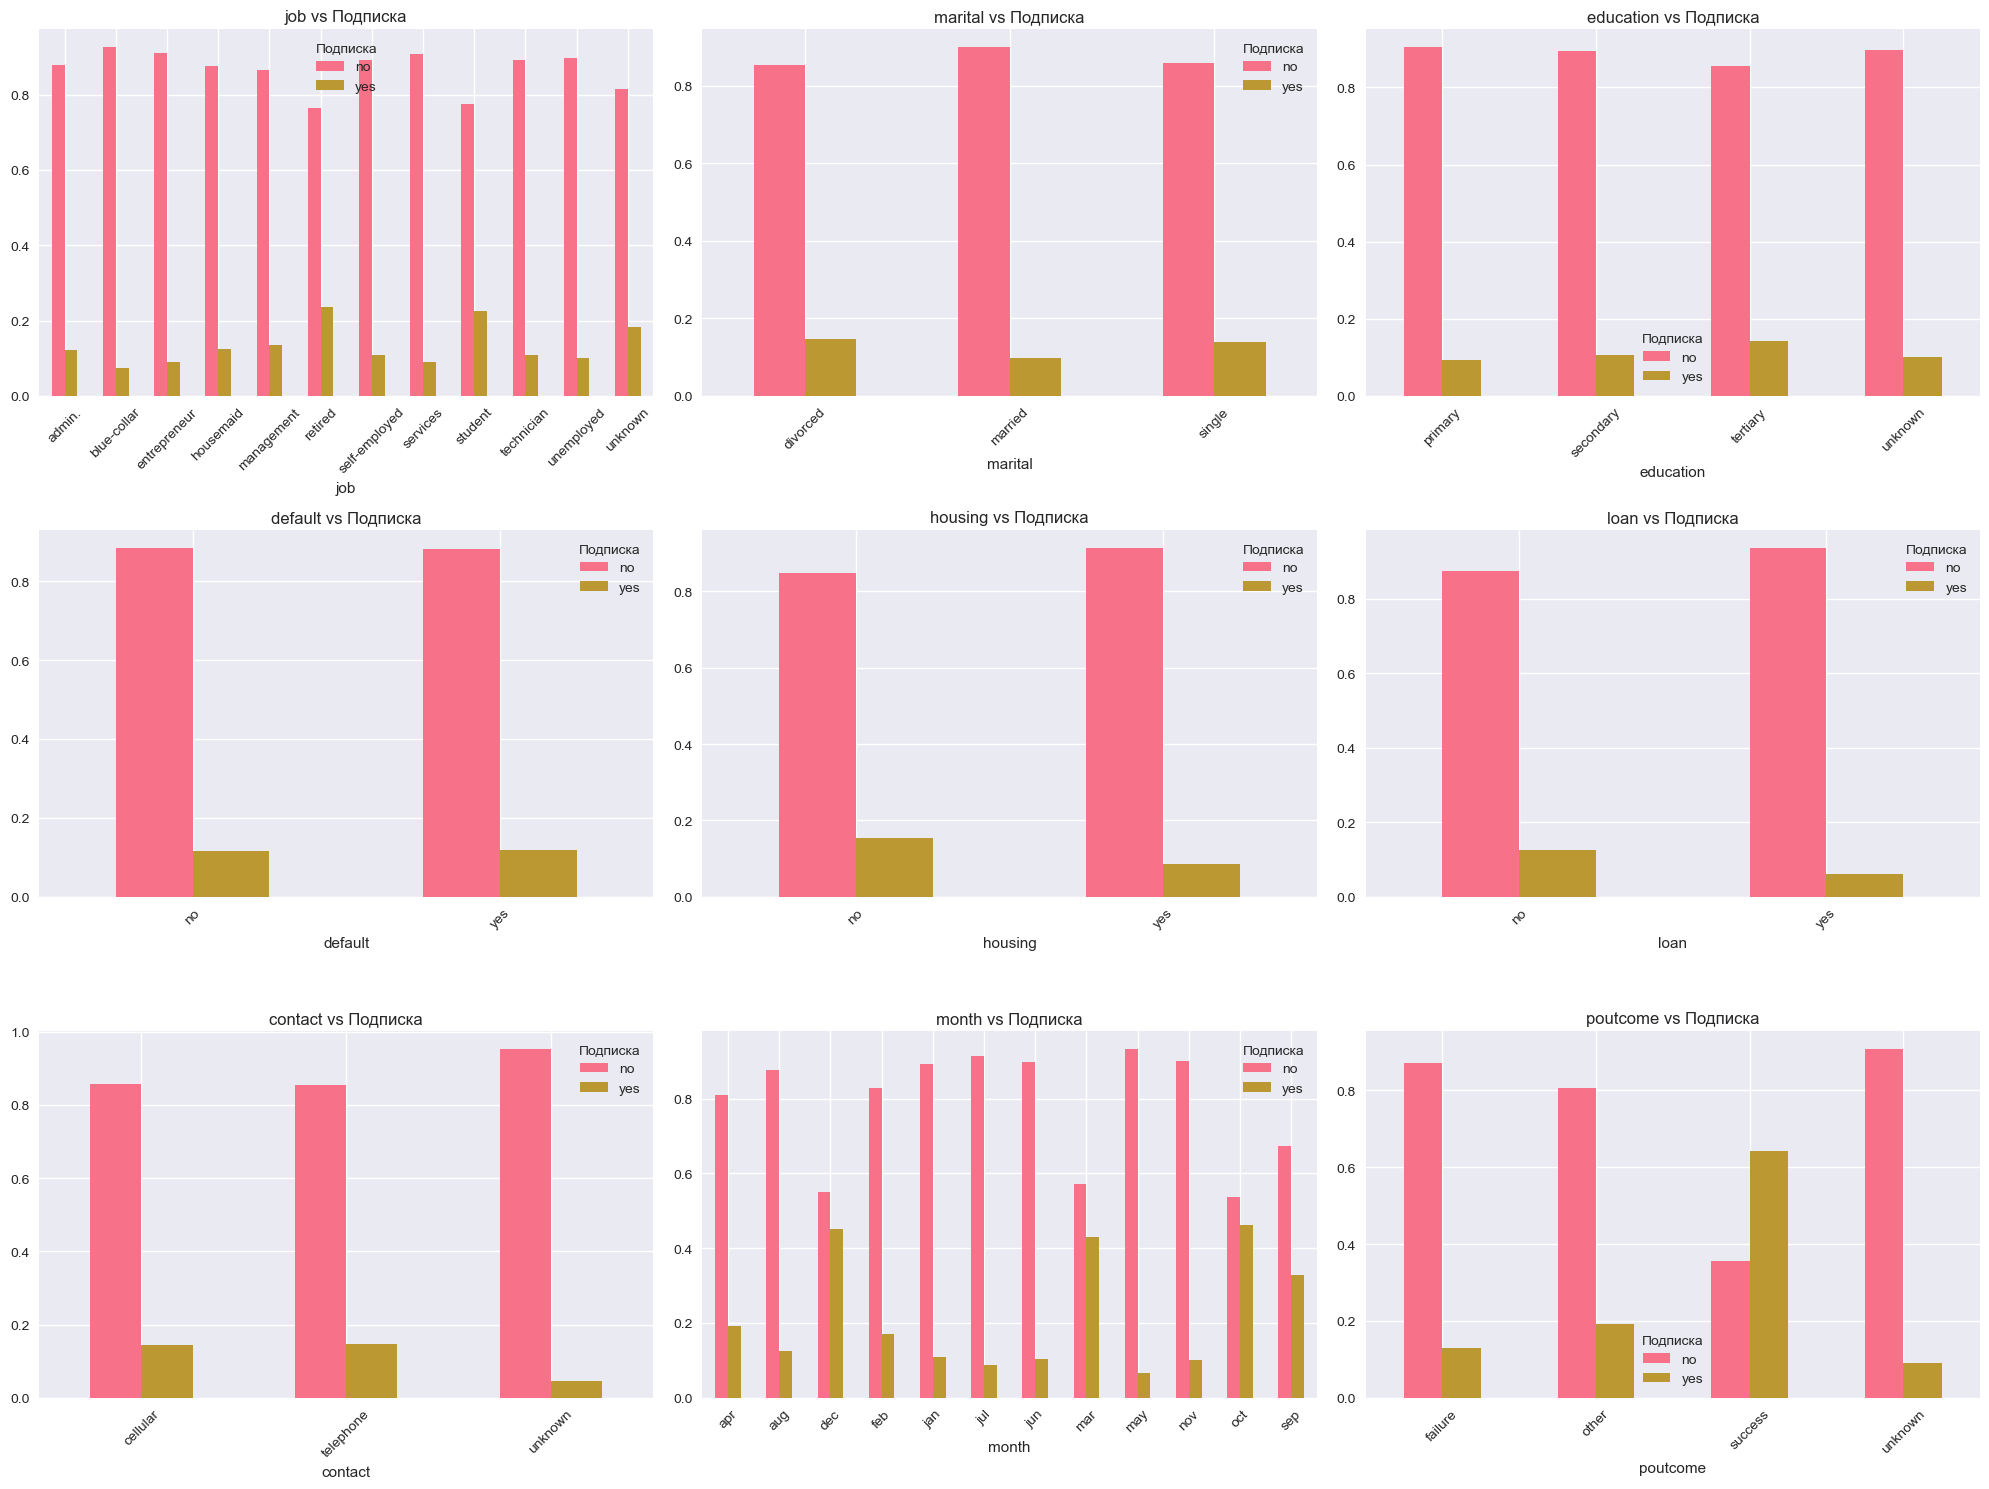

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

cat_vs_target = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for i, col in enumerate(cat_vs_target):
    # Нормированная столбчатая диаграмма
    pd.crosstab(df[col], df['y'], normalize='index').plot(kind='bar', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} vs Подписка')
    axes[i//3, i%3].tick_params(axis='x', rotation=45)
    axes[i//3, i%3].legend(title='Подписка')

plt.tight_layout()
plt.show()

8. Тепловая карта корреляций (для числовых признаков)

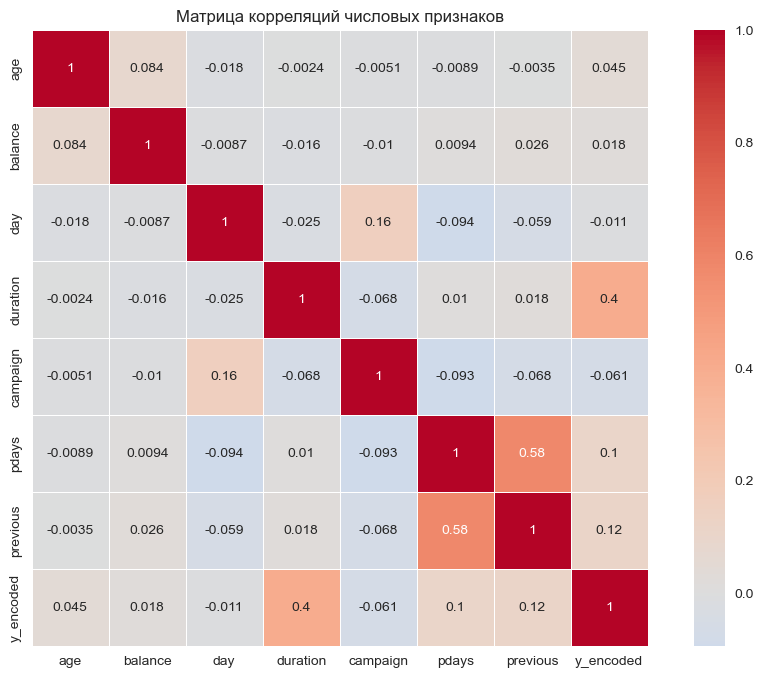

In [10]:
plt.figure(figsize=(12, 8))

# Кодируем целевую переменную для корреляции
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['y_encoded'] = le.fit_transform(df['y'])

# Вычисляем корреляцию
correlation = df_encoded[numerical_cols + ['y_encoded']].corr()

# Строим тепловую карту
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Матрица корреляций числовых признаков')
plt.show()

9. Анализ по месяцам

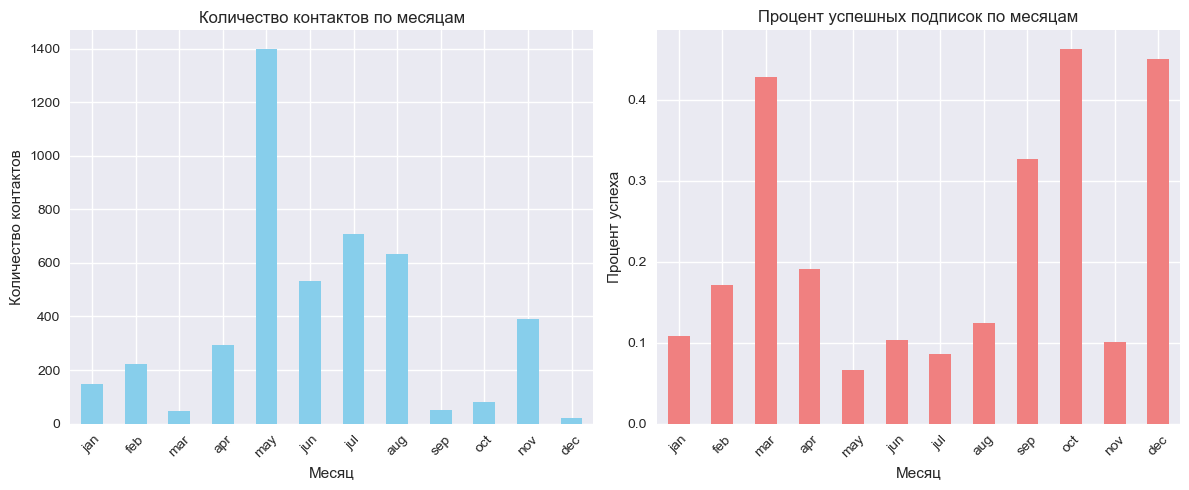

In [20]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(12, 5))

# График распределения контактов
plt.subplot(1, 2, 1)
contact_by_month = df['month'].value_counts().reindex(month_order)
contact_by_month.plot(kind='bar', color='skyblue')
plt.title('Количество контактов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество контактов')
plt.xticks(rotation=45)

# График успешности по месяцам
plt.subplot(1, 2, 2)
success_by_month = pd.crosstab(df['month'], df['y'], normalize='index').reindex(month_order)
success_by_month['yes'].plot(kind='bar', color='lightcoral')
plt.title('Процент успешных подписок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Процент успеха')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

10. Scatter plot для анализа взаимосвязей между числовыми признаками

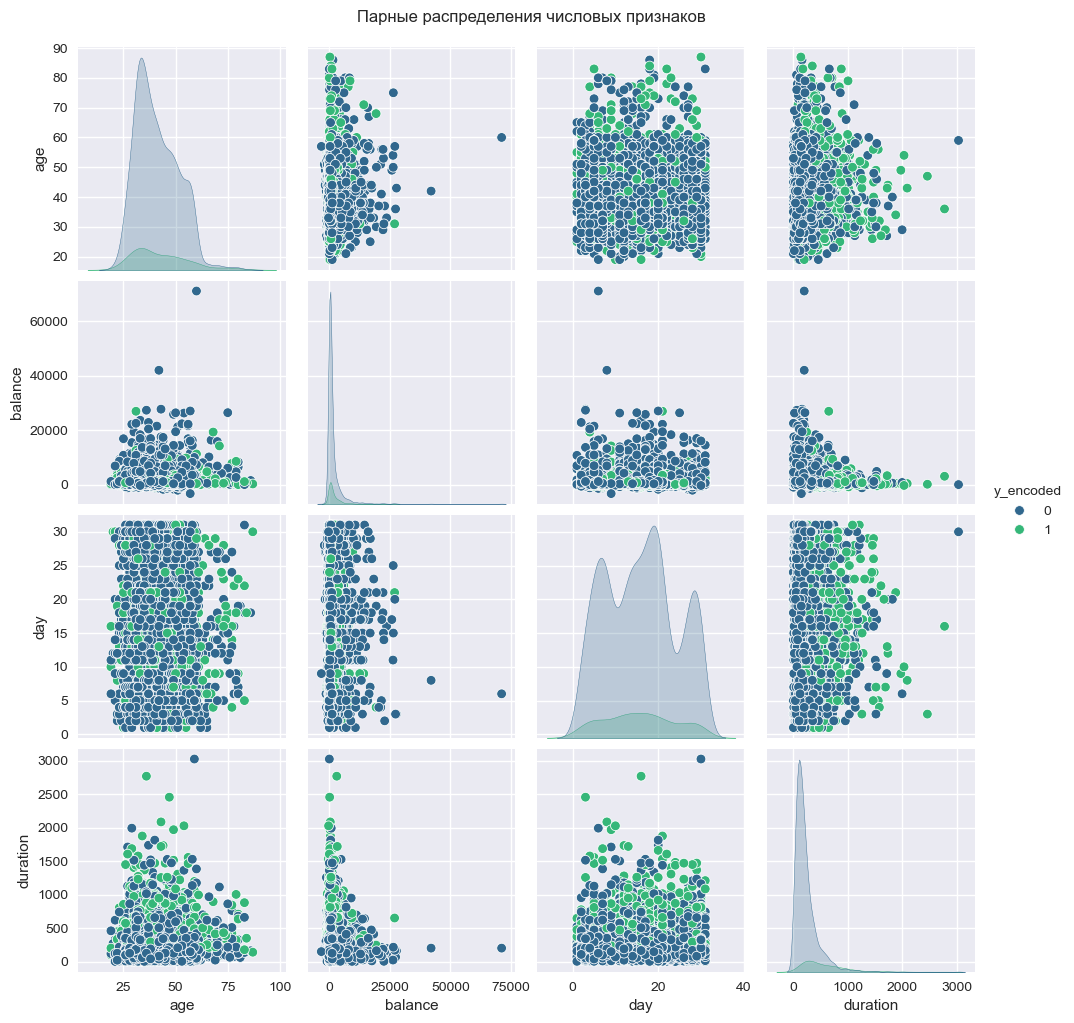

In [11]:
sns.pairplot(df_encoded[numerical_cols[:4] + ['y_encoded']], 
             hue='y_encoded', palette='viridis', diag_kind='kde')
plt.suptitle('Парные распределения числовых признаков', y=1.02)
plt.show()

11. Violin plot для детального анализа распределений

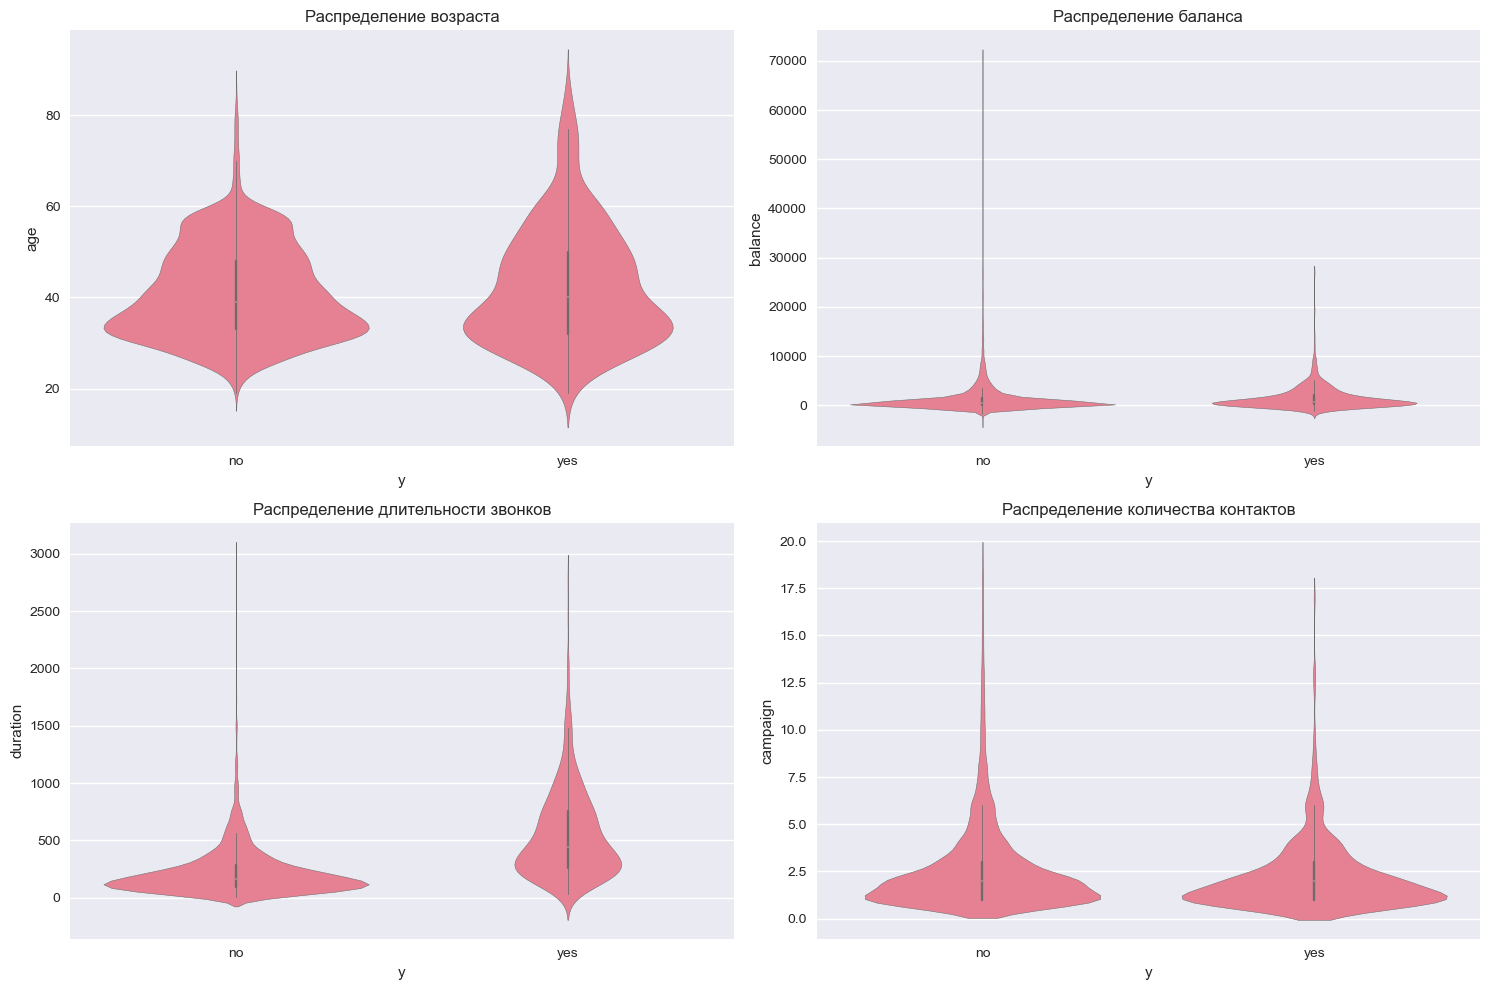

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.violinplot(data=df, x='y', y='age', ax=axes[0,0])
axes[0,0].set_title('Распределение возраста')

sns.violinplot(data=df, x='y', y='balance', ax=axes[0,1])
axes[0,1].set_title('Распределение баланса')

sns.violinplot(data=df, x='y', y='duration', ax=axes[1,0])
axes[1,0].set_title('Распределение длительности звонков')

sns.violinplot(data=df[df['campaign'] < 20], x='y', y='campaign', ax=axes[1,1])
axes[1,1].set_title('Распределение количества контактов')

plt.tight_layout()
plt.show()

12. Анализ профессий и образования

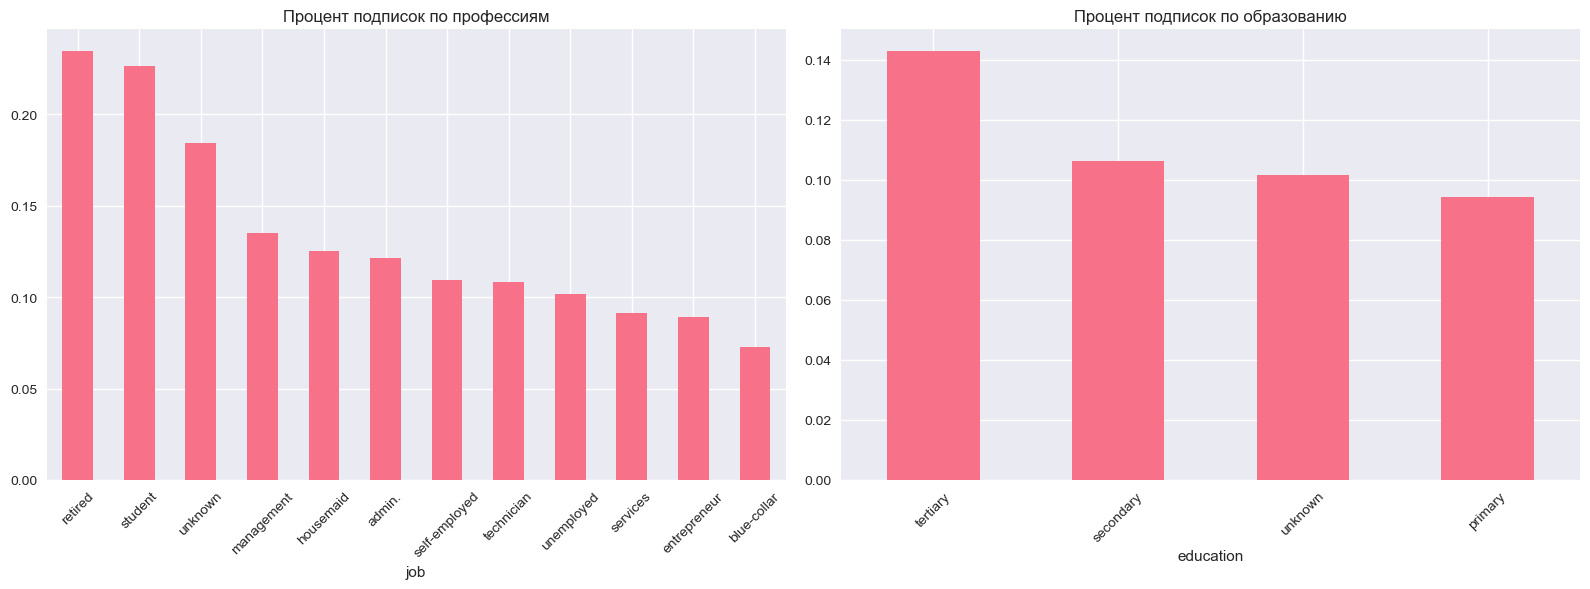

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Профессии с наибольшим процентом подписок
job_success = pd.crosstab(df['job'], df['y'], normalize='index')
job_success['yes'].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
axes[0].set_title('Процент подписок по профессиям')
axes[0].tick_params(axis='x', rotation=45)

# Образование с наибольшим процентом подписок
edu_success = pd.crosstab(df['education'], df['y'], normalize='index')
edu_success['yes'].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
axes[1].set_title('Процент подписок по образованию')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

13. Анализ результатов предыдущих кампаний

<Figure size 1000x600 with 0 Axes>

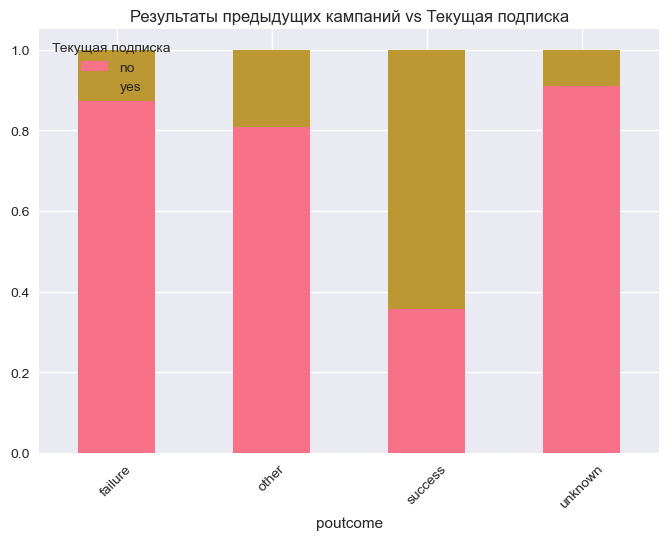

In [15]:
plt.figure(figsize=(10, 6))
poutcome_analysis = pd.crosstab(df['poutcome'], df['y'], normalize='index')
poutcome_analysis.plot(kind='bar', stacked=True)
plt.title('Результаты предыдущих кампаний vs Текущая подписка')
plt.xticks(rotation=45)
plt.legend(title='Текущая подписка')
plt.show()

14. Фасетная сетка для многомерного анализа

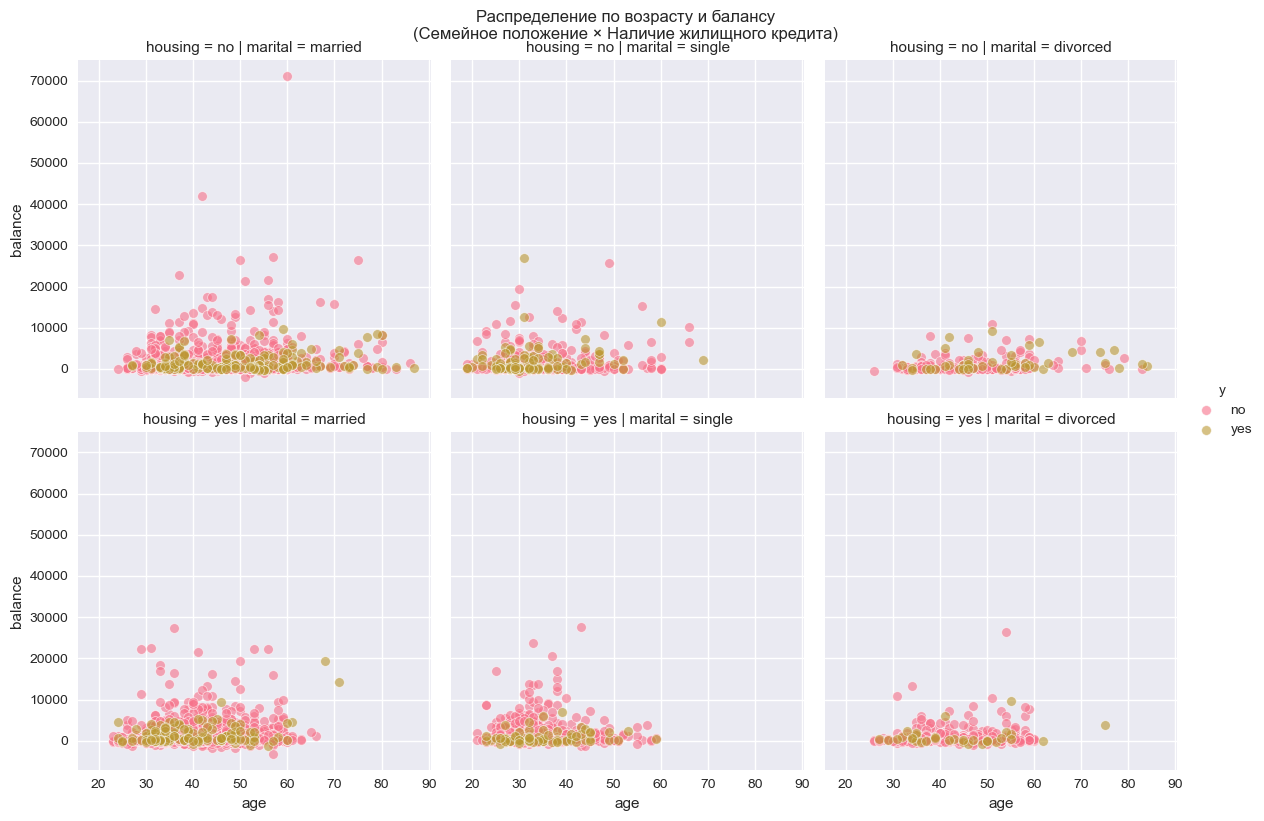

In [16]:
g = sns.FacetGrid(df, col='marital', row='housing', hue='y', height=4)
g.map(sns.scatterplot, 'age', 'balance', alpha=0.6)
g.add_legend()
plt.suptitle('Распределение по возрасту и балансу\n(Семейное положение × Наличие жилищного кредита)', y=1.02)
plt.show()

15. Сводная таблица и тепловая карта успешности по нескольким признакам

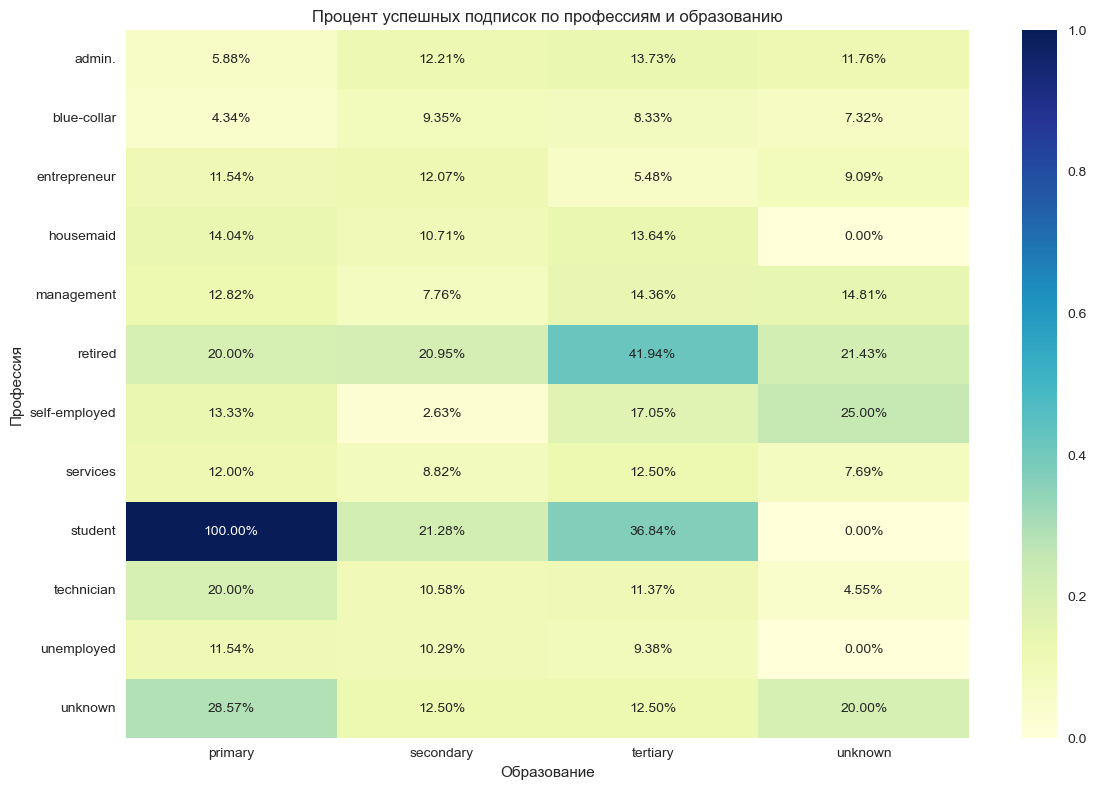

In [17]:
pivot_data = df.pivot_table(index='job', columns='education', 
                           values='y', aggfunc=lambda x: (x=='yes').mean())

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.2%')
plt.title('Процент успешных подписок по профессиям и образованию')
plt.xlabel('Образование')
plt.ylabel('Профессия')
plt.tight_layout()
plt.show()